## Applied Key Studies of ML and DL in Key Areas II - Topic 1

>**Conda Environment**   
conda create -n ACSML rdkit python=3.9  
conda activate ACSML    
pip install pandas numpy sklearn requests   
pip install rdkit seaborn mols2grid 


### 1.0 - RDKit

> The RDKit is a powerful Python library for working with chemical information. It can be used to generate descriptors, analyse chemical structures, visualize molecules and generate clusters. By combining this powerful tool with the simplicity of a Jupyter notebook, you can quickly explore your chemical data and gain insights into relationships between your molecules. The RDKit is free and open-source, and can be used in a variety of workflows.



In [1]:
#Import Libraries
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw #RDKit drawing

from rdkit import Chem #RDKit Chemistry

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 300, 300
rdDepictor.SetPreferCoordGen(True)

### 1.1 - An introduction to the SMILES notation
The simplified molecular-input line-entry system (SMILES) is a specification in the form of a line notation for describing the structure of chemical species using short ASCII strings. SMILES strings can be imported by most molecule editors for conversion back into two-dimensional drawings or three-dimensional models of the molecules.

SMILES provides a simple, compact, somewhat human-readable notation for representing molecules.  SMILES was developed by [David Weininger](https://pubs.acs.org/doi/10.1021/ci00057a005) in the 1980s, a time when software like ChemDraw or Marvin Sketch for drawing chemical structures was unheard of.  While we now have easy access to chemical sketchers and don't typically have to create SMILES by hand, the format is still widely used.  Over time, SMILES has become one of a small number of generally accepted formats for representing chemical structures.  SMILES are also often referred to as "SMILES strings".  While it's fine to refer to a SMILES as a SMILES string, one should **never** refer to a single SMILES as "SMILE". Remember, "S" stands for "system".  Please don't refer to a "SMILE" or a "SMILE string". 

Reading a SMILES code allows you to identify: 

> **Atoms**   
    SMILES are a combination of text symbols that represent atoms, bonds, and ring closures. Common organic elements are represented by their atomic symbols (B,C,N,O,S,F,Cl,Br,I) while less usual atomic symbols with two characters are represented in square brackets ([Au],[Ag],[Se]). 


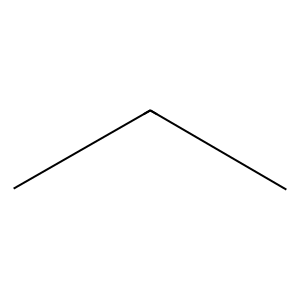

In [2]:
propane = Chem.MolFromSmiles("CCC")
propane

> Hydrogens are **usually** implicit.  There are a few exceptions that we'll get to later.  Note that when we wrote the SMILES, we didn't have to specify the hydrogens.

In general, carbon can form up to four covalent bonds, each bond involving the sharing of one pair of electrons. This allows carbon to form a wide variety of organic molecules, including alkanes, alkenes, alkynes, and many other functional groups. In some cases, carbon can form fewer than four covalent bonds, as in the case of carbocations, which are positively charged carbon atoms that have only three bonds. In other cases, carbon can form more than four covalent bonds, as in the case of carbenes and other reactive intermediates. However, in most stable organic molecules, carbon forms exactly four covalent bonds.


> **Bonds**   
    Single bonds between adjacent atoms are implicit.  For instance, "CCC" will represent "n-propane".  Double bonds are indicated by "=" and triple bonds are indicated by "#".  Let's take a look at how we can depict the SMILES for a few molecules.  In order to do this, we'll use the RDKit Python library.  We will start by importing the RDKit Chemistry library. 

Chemical bonds are formed when two or more atoms share or exchange electrons to achieve a more stable electronic configuration. The strength of the bond and the number of electrons shared determine the type of bond that is formed. There are three main types of chemical bonds: single, double, and triple bonds.

A **single bond** is formed when two atoms share one pair of electrons. It is the weakest type of bond and is often found between two nonmetals or a metal and a nonmetal. The most common example of a single bond is the bond between two hydrogen atoms, which share a single pair of electrons. A **double bond** is formed when two atoms share two pairs of electrons. It is stronger than a single bond and is often found between two nonmetals or between a nonmetal and a metal. Double bonds are found in a variety of molecules, including carbon dioxide and oxygen gas. A **triple bond** is formed when two atoms share three pairs of electrons. It is the strongest type of bond and is often found between two nonmetals. Triple bonds are less common than single or double bonds, but are found in molecules such as nitrogen gas and acetylene.

In general, as the number of bonds between two atoms increases, the bond length decreases and the bond strength increases. Double and triple bonds are shorter and stronger than single bonds. Additionally, the presence of double and triple bonds can have a significant effect on the reactivity and chemical properties of molecules.

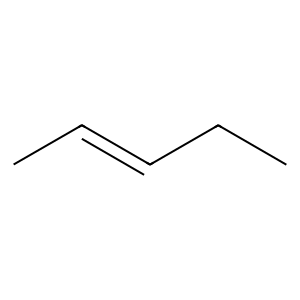

In [3]:
#Let's use a double bond to construct the corresponding SMILES.
mol = Chem.MolFromSmiles("CC=CCC")
mol

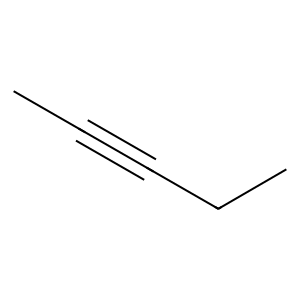

In [4]:
#In a similar fashion, we can incorporate a triple bond and write the SMILES for 2-pentene. 
mol = Chem.MolFromSmiles("CC#CCC")
mol

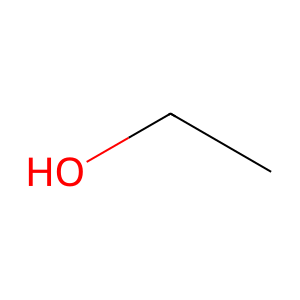

In [5]:
#Of course, we can go beyond simple hydrocarbons, let's look at some more interesting examples.
ethanol = Chem.MolFromSmiles("CCO")
ethanol

The ethanol example above brings up another interesting point about SMILES, hydrogens are **usually** implicit.  There are a few exceptions that we'll get to later.  Note that when we wrote the SMILES for ethanol, we didn't have to specify the hydrogen on the oxygen.  Oxygen normally has a valence of two, the oxygen in ethanol only has one attached hydrogen, therefore we assume it has one hydrogen attached.  Similarly, the first carbon in ethanol has one other carbon attached, since carbon typically has a valence of four we assume that it has three hydrogens attached.  Neither the hydrogen on the alcohol oxygen nor the carbons needs to be explicitly specified. 

This brings up another point.  Hydrogen atoms can be used in SMILES, but the hydrogens must be contained within square brackets and associated with a heavy atom.  For instance, it is valid to write the SMILES for ethanol as CC[OH], it's equally valid to write ethanol as [CH3][CH2][OH].  As an exercise, depict the two representations above for ethanol.

> **Charges**   
    Positive and negative charges are included by adding "+" or "-" in square brackets with the atom type. In addition, hydrogens attached to the atom must be explicitly specified. 

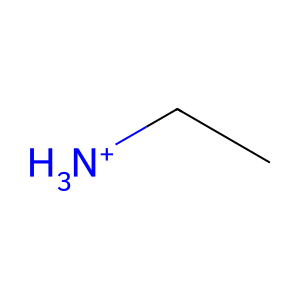

In [6]:
#Here's ethylamine
ethylamine = Chem.MolFromSmiles("CC[NH3+]")
ethylamine

> **Branching**         
    Branching in SMILES is indicated with parentheses.  

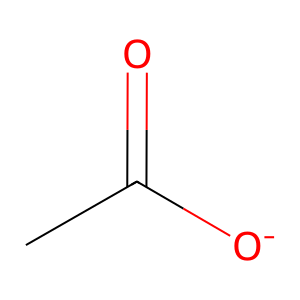

In [7]:
#Here's acetate, more on parentheses and branching below.
acetate = Chem.MolFromSmiles("CC(=O)[O-]")
acetate

> **Rings**     
    In SMILES, rings are indicated by specifying a "closure digit" indicating atoms that are connected.  For instance, the SMILES for cyclohexane is C1CCCCC1. 

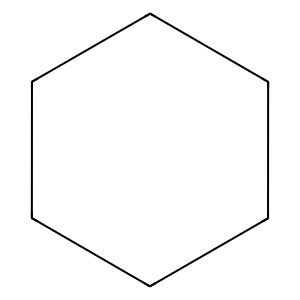

In [8]:
Chem.MolFromSmiles("C1CCCCC1")

Double bonds and heteroatoms can be put into rings in the same way they were in acyclic structures. 

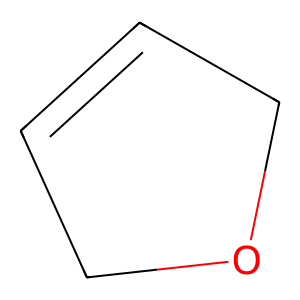

In [9]:
mol = Chem.MolFromSmiles("C1=CCOC1")
mol

In [10]:
#Let's take a look at a few more examples.  
#In order to look at more than one example, we'll put the SMILES and the names of the associated molecules into a text buffer. 

# define a text buffer for our examples
examples = """C(C)(C)O isopropanol
C(Cl)(Cl)(Cl)Cl carbon tetrachloride
CC(=O)O acetic acid"""
# not that we use the second argumen to split to only return two tokens
smiles_list = [x.split(" ",1) for x in examples.split("\n")]

smiles_list

[['C(C)(C)O', 'isopropanol'],
 ['C(Cl)(Cl)(Cl)Cl', 'carbon tetrachloride'],
 ['CC(=O)O', 'acetic acid']]

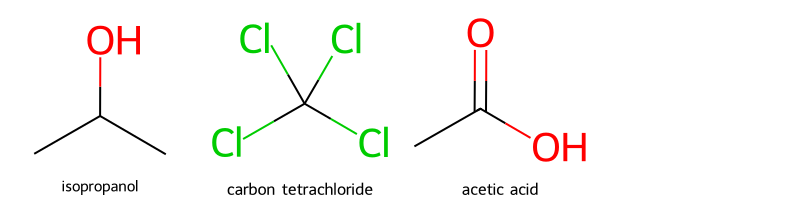

In [11]:
from rdkit.Chem.Draw import MolsToGridImage

def display_structures(smiles_list):
    mol_list = []
    name_list = []
    for smiles, name in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
        name_list.append(name)
    return MolsToGridImage(mol_list,legends=name_list,molsPerRow=4)

display_structures(smiles_list)

### 1.1.1 Exercise

Write a NEW python notebook able to display the chemical structures for the following compounds. If you don't know the structures, google the names and find out the corresponding SMILES code. 

1. Aspirin
2. isopropanal
3. glucose
4. caffeine
5. propanoic acid
6. 2-t-butyl-3-hydroxy-propane

### 1.2 Canonical SMILES     
There are many ways to write a SMILES for the same molecule.  For instance, in the cell below, we show five different ways to write the SMILES for pentane. 

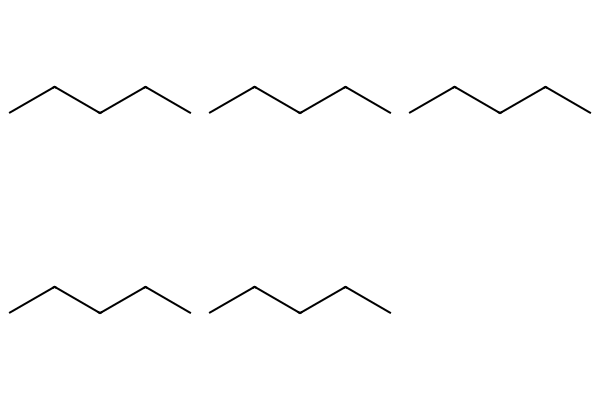

In [12]:
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
# If the line below doesn't make sense to you, take a look at list comprehensions in Python
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
Chem.Draw.MolsToGridImage(pentane_mol_list)

If the same molecule can have several SMILES, it can be difficult to keep track of which molecules are the same.  Fortunately, [the RDKit](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html) and many other Cheminformatics toolkits have methods for creating what is called a **canonical** representation.  These methods should always create the same SMILES for a molecule.  Here's an example where we create a canonical SMILES for the pentane_smiles_list above. Note that all the input SMILES are different but all the output SMILES are the same.  It's important to know that all Cheminformatics toolkits do not generate the same canonical SMILES.

In [15]:
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
# If the line below doesn't make sense to you, take a look at list comprehensions in Python
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
for mol in pentane_mol_list:
    pentane_smiles = Chem.MolToSmiles(mol, canonical=True)
    print(pentane_smiles)

CCCCC
CCCCC
CCCCC
CCCCC
CCCCC


### 1.2.1 Exercise
Write a NEW python notebook to determine the number of unqiue molecule represented by **smiles_list**

In [16]:
smiles_list = ["C(=N)(N)N.Cl", "Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN","Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1","Cl.N=C(N)N", \
        "CCC(C)C1(C(=O)NC(=O)[N-]C1=O)CC.[Na+]", "C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2CC[C@]4([C@H]3CC[C@]4(C)O)C",\
        "CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+]", "Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.C(CN)N",\
        "C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C", "c1ccnc(c1)NS(=O)(=O)c2ccc(cc2)N"]
